In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dt=pd.read_csv("delivery_time.csv")
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
#delivery time is dependent variable

In [40]:
dt=dt.rename(columns={"Delivery Time":"DT","Sorting Time":"ST"})

In [41]:
dt

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [42]:
dt.head(10)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [43]:
dt.tail(10)

,DT,ST
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [44]:
dt.shape

(21, 2)

In [45]:
dt.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# EDA 

In [46]:
dt.isnull()

,DT,ST
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [47]:
dt.isnull().sum()

DT    0
ST    0
dtype: int64

In [48]:
dt.dtypes

DT    float64
ST      int64
dtype: object

In [49]:
dt.nunique()

DT    21
ST     9
dtype: int64

In [50]:
import warnings
warnings.filterwarnings("ignore")

# Plots

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

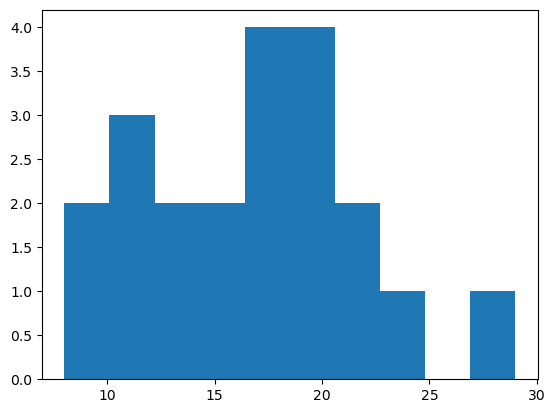

In [54]:
plt.hist(dt['DT'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

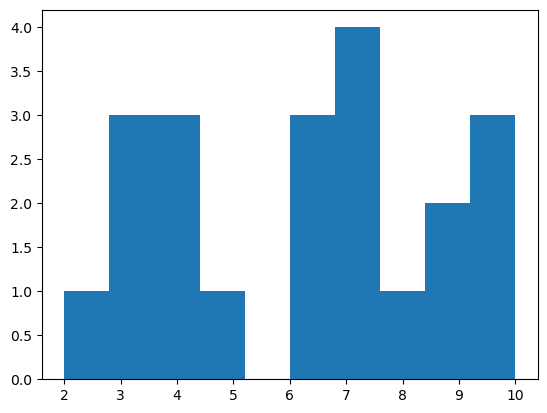

In [55]:
plt.hist(dt['ST'])

Text(0, 0.5, 'ST')

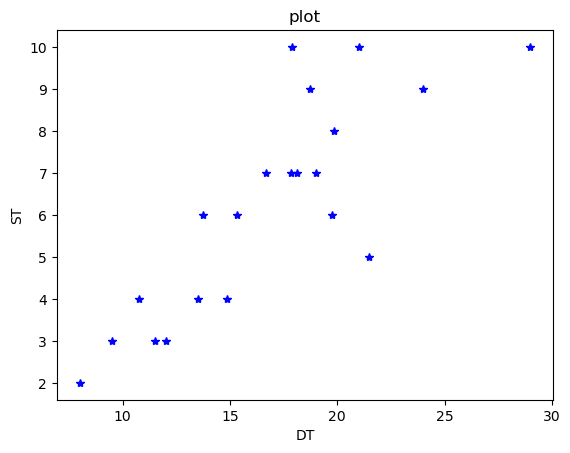

In [56]:
plt.plot(dt['DT'],dt['ST'],'b*')
plt.title('plot')
plt.xlabel('DT')
plt.ylabel('ST')

<AxesSubplot:xlabel='DT', ylabel='ST'>

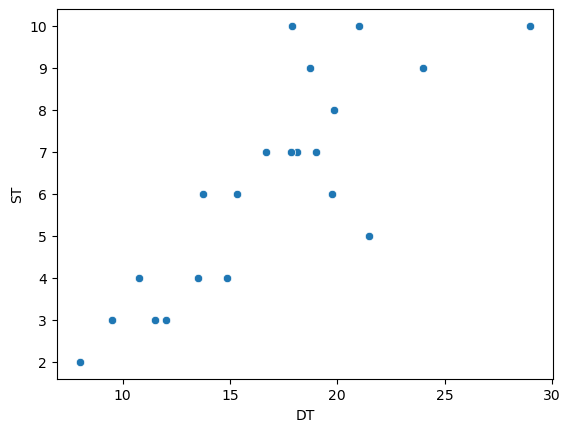

In [57]:
sns.scatterplot(dt['DT'],dt['ST'],data=dt)

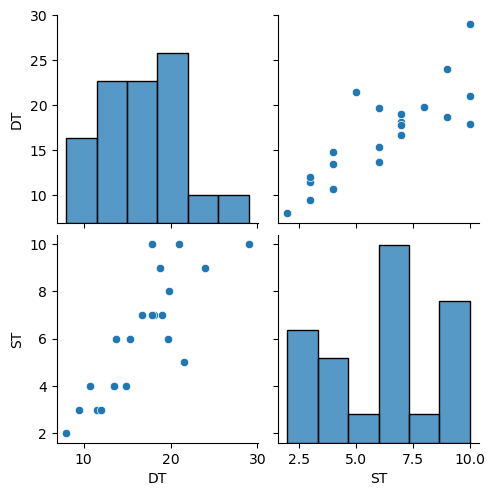

In [58]:
sns.pairplot(dt)

# Correlation

In [59]:
dt.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


# Fitting the line using ordinary least square method  (OLS)

In [60]:
import statsmodels.formula
import statsmodels.formula.api as smf

In [63]:
ml=smf.ols("DT~ST",data=dt).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        15:24:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#since Rsquared value is very les 0.682. we will try to do transformaions

In [68]:
pred=ml.predict(pd.DataFrame(dt['ST']))
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [70]:
ml.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

# 



# RMSE

In [164]:
rmse_lin=np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred))**2))

In [165]:
rmse_lin

2.7916503270617654

In [166]:
pred.corr(dt['DT'])

0.8259972607955325

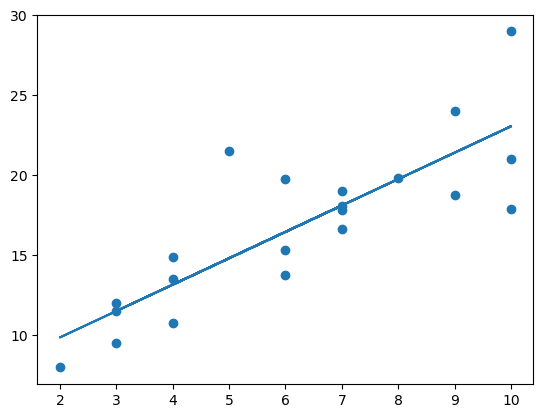

In [167]:
plt.scatter(dt['ST'],dt['DT'])
plt.plot(dt['ST'],pred)

# Applying transformations

# Log transformation

In [168]:
ml2=smf.ols('DT~np.log(ST)',data=dt).fit()

In [169]:
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.64e-06
Time:                        16:24:04   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
#Rsquared increased to 0.69

In [171]:
pred2=ml2.predict(pd.DataFrame(dt['ST']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [172]:
ml2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [173]:
rmse_log=np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred2))**2))

In [174]:
rmse_log

2.733171476682066

In [175]:
pred2.corr(dt['DT'])

0.8339325279256244

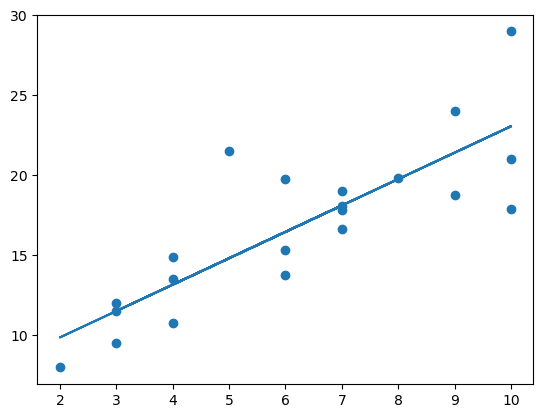

In [176]:
plt.scatter(dt['ST'],dt['DT'])
plt.plot(dt['ST'],pred)

# Exponential

In [177]:
ml3=smf.ols('np.log(DT)~ST',data=dt).fit()

In [178]:
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.59e-06
Time:                        16:24:04   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
#r2 increased to 0.71


In [180]:
pred_log=ml3.predict(pd.DataFrame(dt['ST']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [181]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [182]:
ml3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [183]:
pred3.corr(dt['DT'])

0.808578010828926

In [184]:
rmse_exp=np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred3))**2))
rmse_exp

2.940250323056201

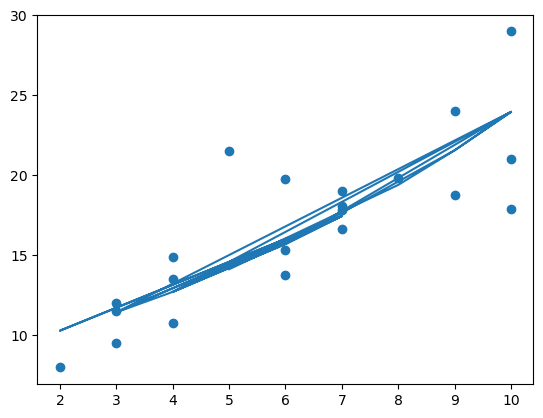

In [185]:
plt.scatter(dt['ST'],dt['DT'])
plt.plot(dt['ST'],pred3)

# Quad

In [186]:
dt['ST_sq']=dt.ST*dt.ST


In [187]:
dt

,DT,ST,ST_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [188]:
ml4=smf.ols('np.log(DT)~ST+ST_sq',data=dt).fit()

In [189]:
ml4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.20e-06
Time:                        16:24:04   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
#r2 is 0.765

In [191]:
pred_quad=ml4.predict(dt)

In [192]:
pred_quad

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [193]:
pred4=np.exp(pred_quad)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [194]:
ml4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [195]:
rmse_quad=np.sqrt(np.mean((np.array(dt['DT'])-np.array(pred4))**2))

In [196]:
rmse_quad

2.799041988740925

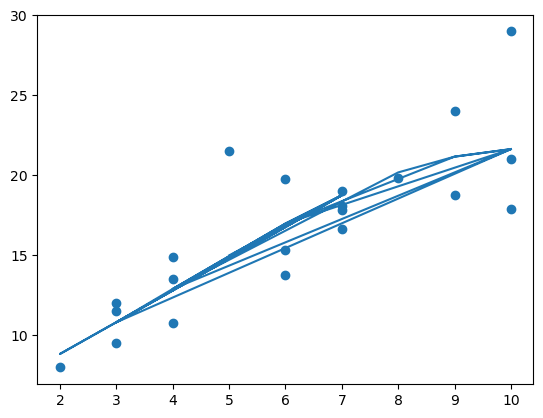

In [197]:
plt.scatter(dt['ST'],dt['DT'])
plt.plot(dt['ST'],pred4)

# Creating table for all values

In [198]:
data={"model":pd.Series(['rmse_lin','rmse_log','rmse_exp','rmse_quad']),
      'rmse_value':pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
     'R_squared':pd.Series([ml.rsquared,ml2.rsquared,ml3.rsquared,ml4.rsquared])}


In [199]:
table=pd.DataFrame(data)
table

,model,rmse_value,R_squared
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867
